In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
media = pd.read_csv("H:/New folder/Machine learning/mediacompany.csv")
media = media.drop('Unnamed: 7' , axis =1)

In [3]:
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [4]:
media["Date"] = pd.to_datetime(media["Date"]).dt.date

In [5]:
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [6]:
from datetime import date
do = date(2017 , 2 , 28)
d1 = media["Date"]
delta = d1 - do
media["days"] = delta
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [7]:
media["days"] = media["days"].astype(str)
media["days"] = media["days"].map(lambda x:x[0:2])
media["days"] = media["days"].astype(int)

In [8]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


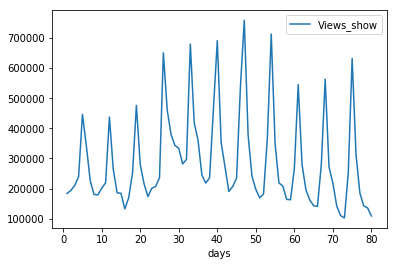

In [9]:
media.plot.line(x = 'days' , y='Views_show')

In [10]:
media["weekday"] = (media["days"]+3)%7
media.weekday.replace(0, 7 ,inplace = True)
media["weekday"] = media["weekday"].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [11]:
X = media[['weekday' , 'Visitors']]
Y = media['Views_show']
media.shape

(80, 9)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
def cond(x):
    if x == 7 or x == 1:
        return 1
    else:
        return 0

media["Weekend"] = [cond(i) for i in media["weekday"]] 

In [14]:

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,Weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [15]:
media['Ad_impression'] /=1000000
X = media[['Weekend' ,  'Ad_impression' ]]
Y = media['Views_show']

In [16]:
import statsmodels.api as sm

In [17]:
X= sm.add_constant(X)
lm3 = sm.OLS(Y,X).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           1.95e-27
Time:                        15:49:18   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.302e+05   4.01e+04     -5.744

In [18]:
X = media[['Weekend' ,  'Ad_impression' ]]
Y = media['Views_show']
lr.fit(X,Y)
views = lr.predict(X)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media['Views_show'], views)
r_square = r2_score(media['Views_show'], views)

In [20]:
print('Mean squared error :', mse)
print('R_suared_value :', r_square)

Mean squared error : 4797239258.824437
R_suared_value : 0.7975978797926214


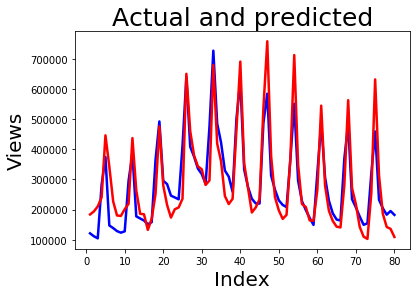

In [21]:
c= [i for i in range(1,81,1)]
plt.xlabel("Index", fontsize= 20)
plt.ylabel("Views",fontsize= 20)
plt.title('Actual and predicted', fontsize= 25)
plt.plot(c, views , color='blue', linewidth =2.5)
plt.plot(c, media['Views_show'] , color='red' ,linewidth =2.5)